<a href="https://colab.research.google.com/github/mad-havan/Bharat_Internship_Tasks/blob/main/TITANIC_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


**DATA PREPROCESSING**

In [ ]:
titanic_df=pd.read_csv('/content/tested.csv')

In [ ]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
titanic_df.shape

(418, 12)

In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Data Visualization**

<Axes: >

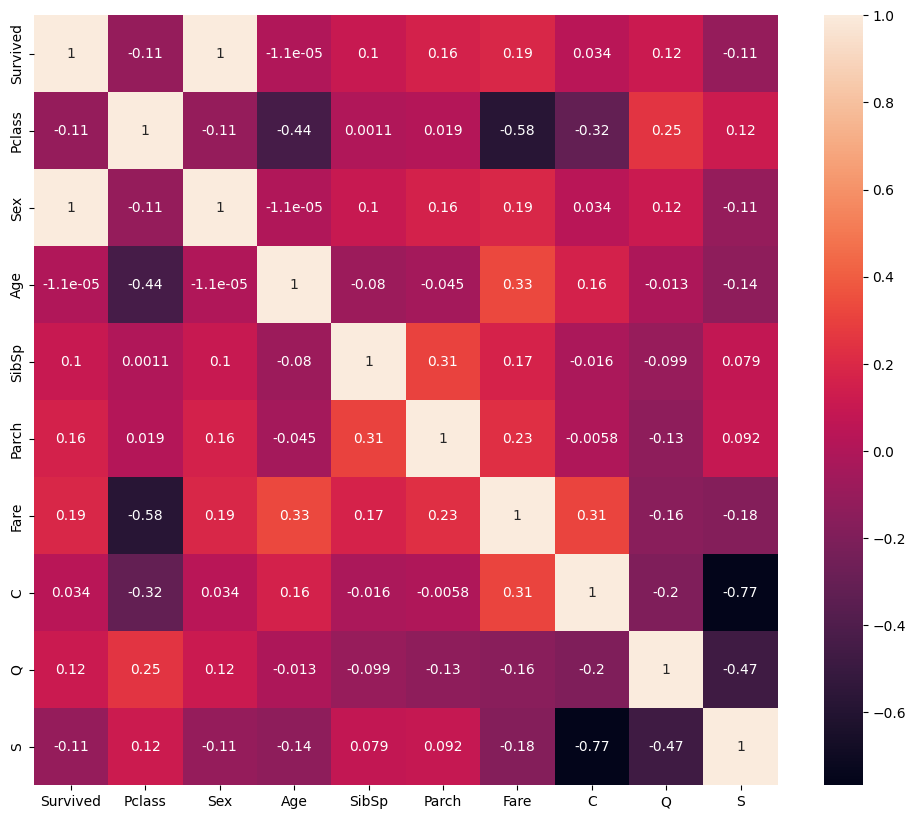

In [ ]:
cr=titanic.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cr,annot=True)

<Figure size 1000x1000 with 0 Axes>

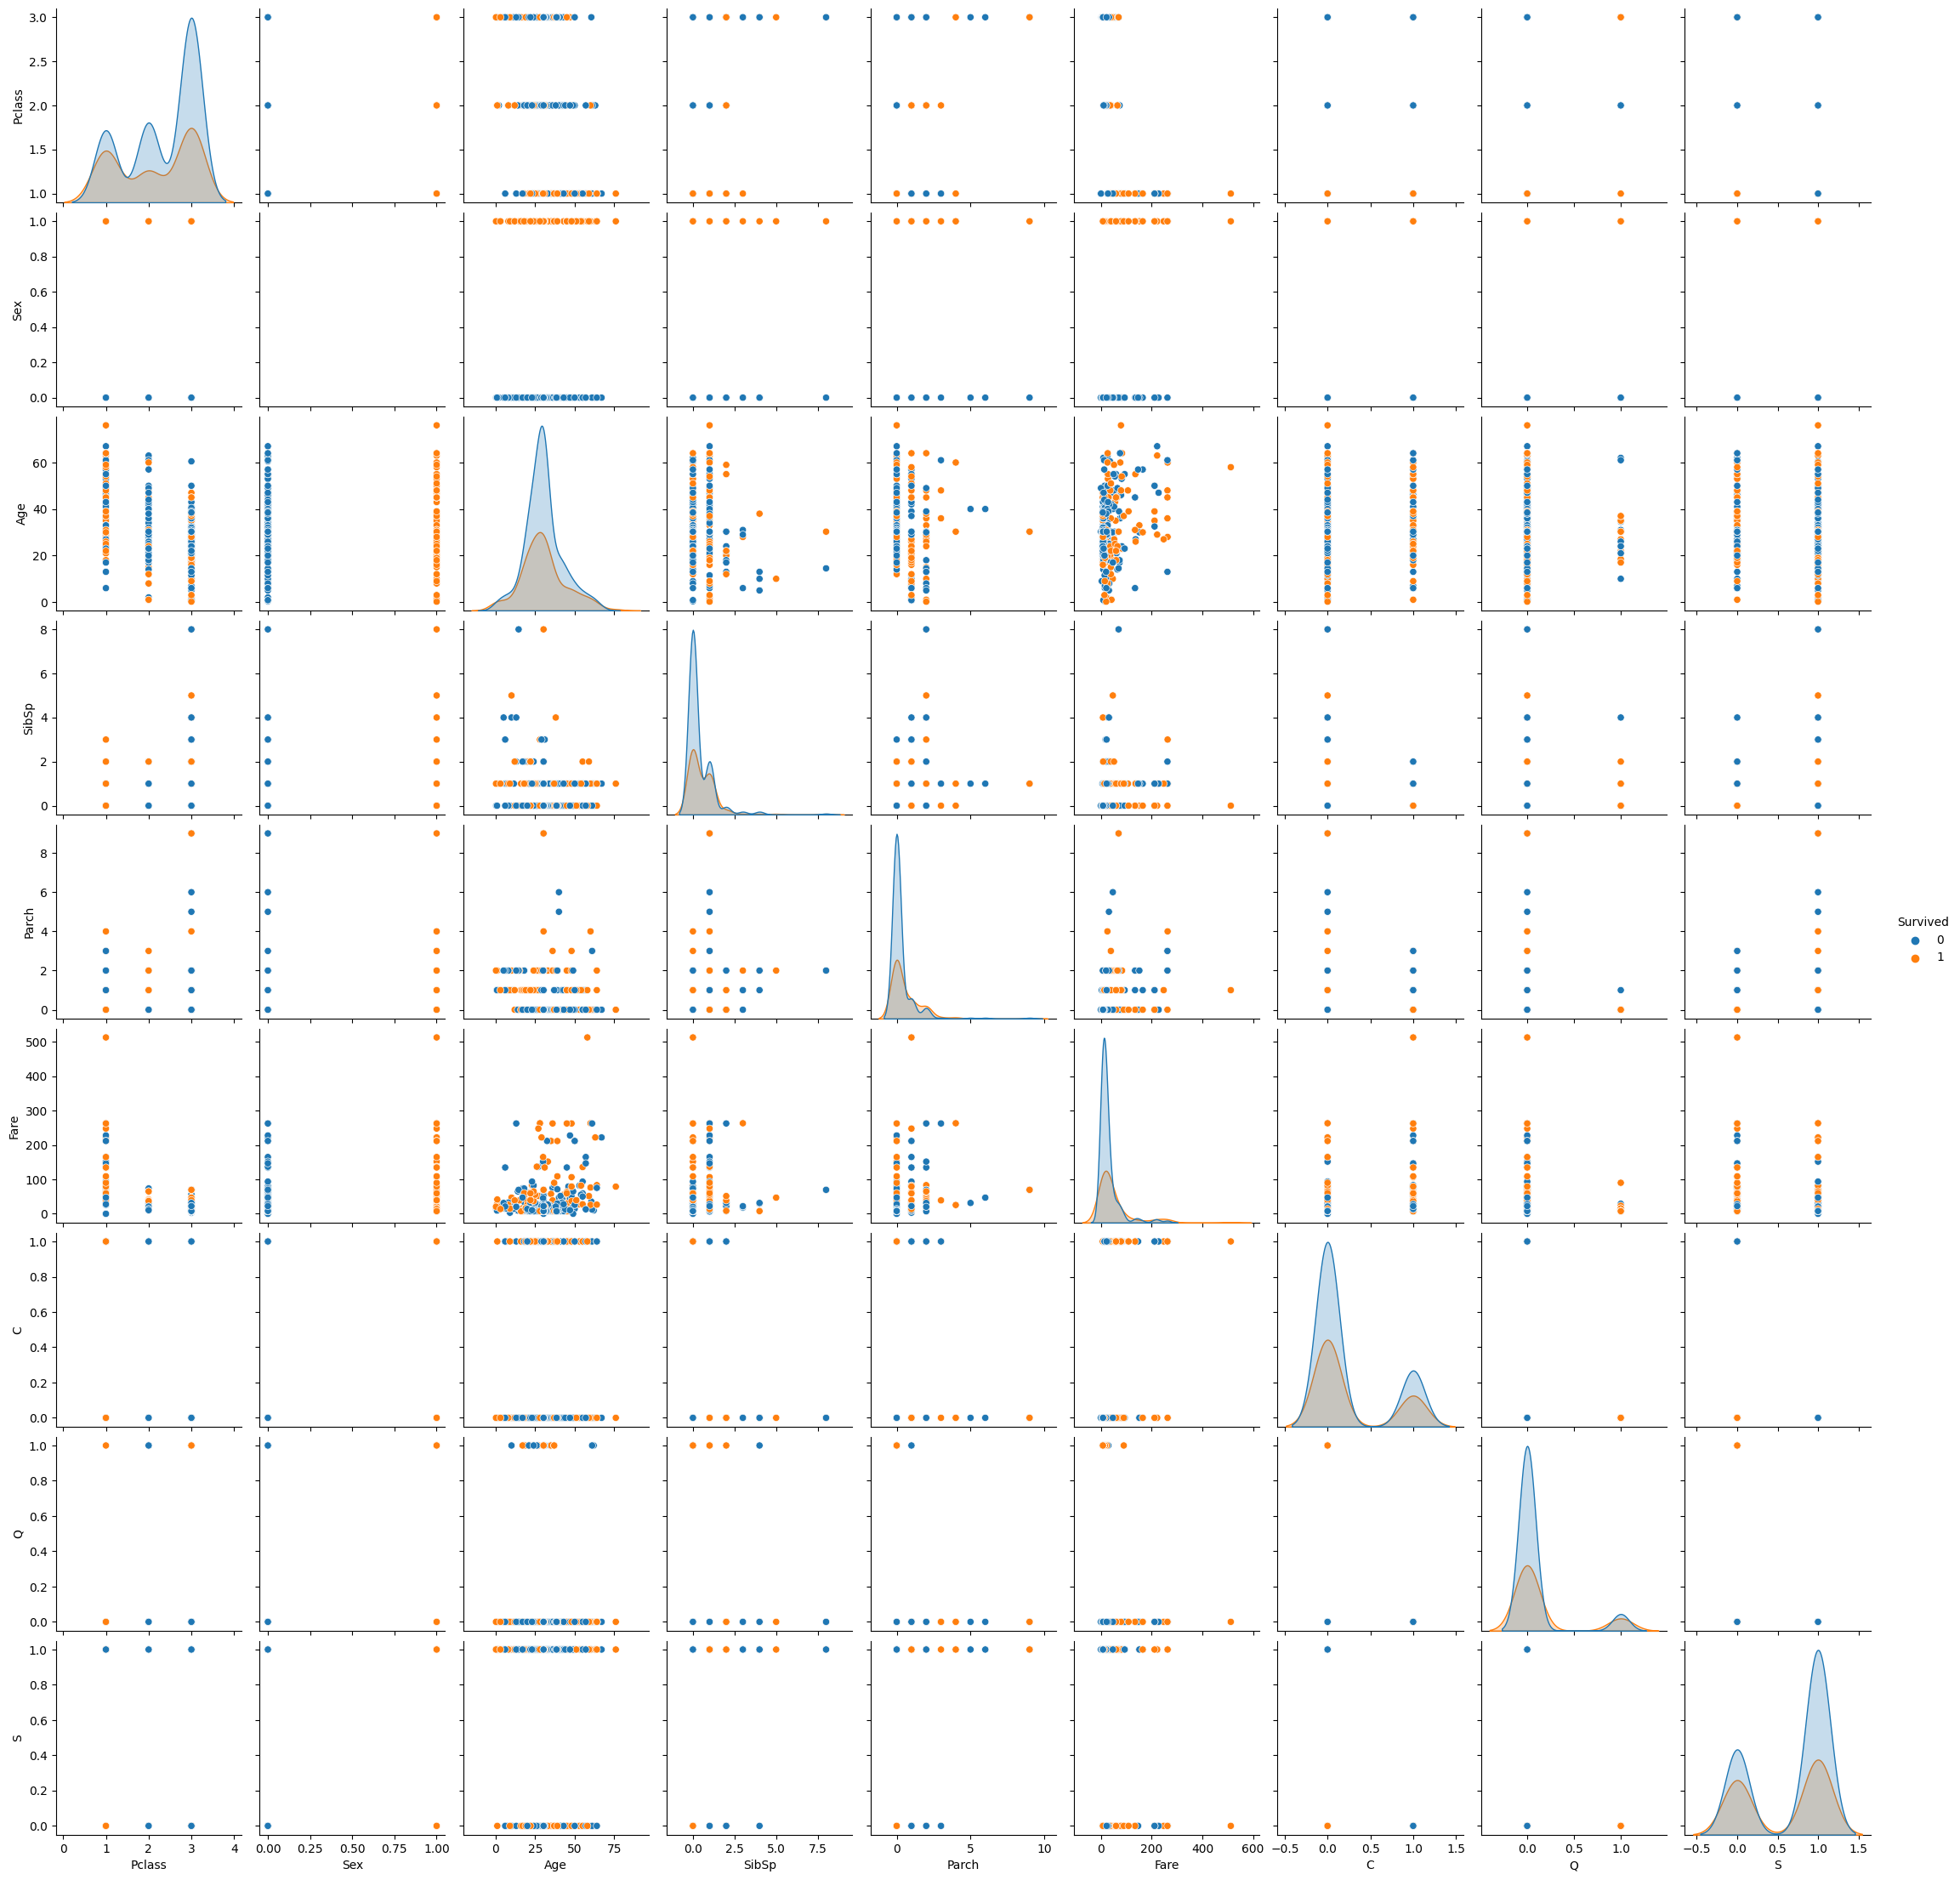

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(titanic,hue='Survived')

<Axes: xlabel='Survived', ylabel='count'>

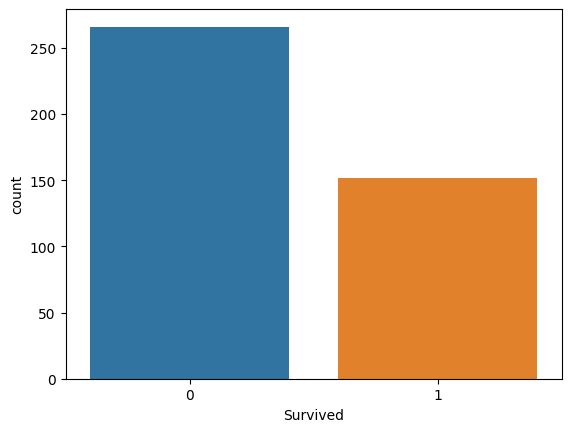

In [ ]:
sns.countplot(x=titanic['Survived'])

<Axes: xlabel='sex', ylabel='count'>

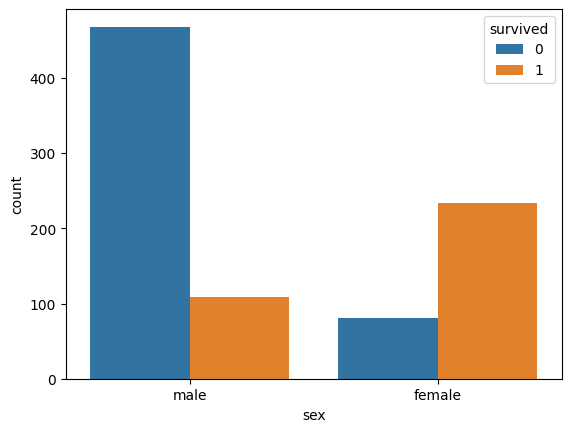

In [ ]:
df = sns.load_dataset("titanic")
sns.countplot(x=df["sex"],hue=df['survived'])

<Axes: xlabel='Sex', ylabel='Count'>

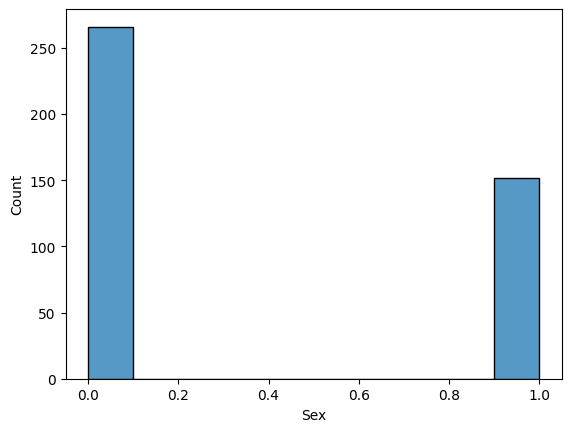

In [ ]:
sns.histplot(data=titanic,x='Sex')

<Axes: xlabel='Sex', ylabel='Count'>

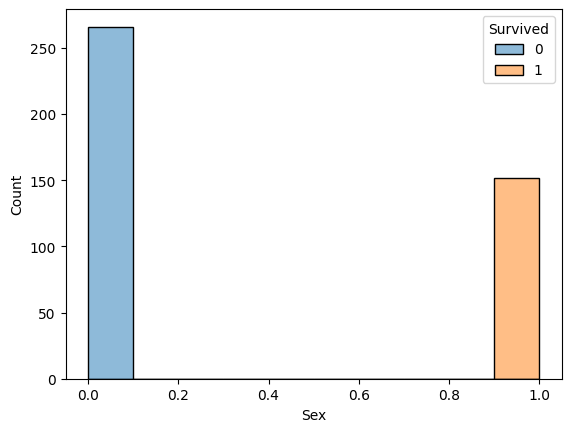

In [ ]:
sns.histplot(data=titanic,x='Sex',hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

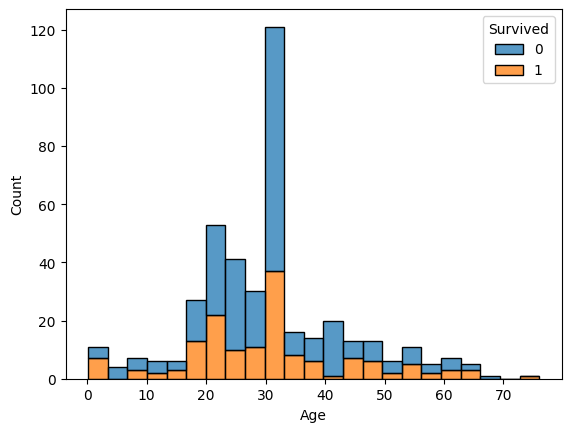

In [ ]:
sns.histplot(data=titanic,x='Age',hue='Survived',multiple='stack')

**Imputation techniques**

In [ ]:
# As 327 values are missing out of 418 values so we can remove this column
titanic=titanic_df.drop(['Cabin'],axis=1)

In [ ]:
# We will replace the missing columns of age column with mean
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
titanic['Fare'].fillna(titanic['Fare'].mean(),inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
titanic.replace({'Sex':{'male':0,'female':1}},inplace=True)
embarked=pd.get_dummies(titanic['Embarked'])


In [ ]:
titanic=pd.concat([titanic,embarked],axis=1)

In [ ]:
titanic=titanic.drop(['Embarked'],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,1,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,1


In [ ]:
#Passenger id, ticket and names doen't gonna influence the target variable so we will drop it
titanic=titanic.drop(['PassengerId'],axis=1)


In [ ]:
titanic=titanic.drop(['Ticket'],axis=1)

In [ ]:
titanic=titanic.drop(['Name'],axis=1)

In [ ]:
titanic.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
Survived,,,,,,,,,
0,2.334586,0.0,30.272699,0.379699,0.274436,27.558326,0.233083,0.082707,0.684211
1,2.144737,1.0,30.272400,0.565789,0.598684,49.747699,0.263158,0.157895,0.578947


**Splitting train and test data**

In [ ]:
X=titanic.drop(['Survived'],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1


In [ ]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
standard_data=scaler.transform(X)
X=standard_data
print(X)

[[ 0.87348191 -0.75592895  0.3349926  ... -0.56814154  2.84375747
  -1.35067551]
 [ 0.87348191  1.32287566  1.32553003 ... -0.56814154 -0.35164743
   0.74037028]
 [-0.31581919 -0.75592895  2.51417495 ... -0.56814154  2.84375747
  -1.35067551]
 ...
 [ 0.87348191 -0.75592895  0.65196458 ... -0.56814154 -0.35164743
   0.74037028]
 [ 0.87348191 -0.75592895  0.         ... -0.56814154 -0.35164743
   0.74037028]
 [ 0.87348191 -0.75592895  0.         ...  1.76012477 -0.35164743
  -1.35067551]]


In [ ]:
Y=titanic['Survived']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,test_size=0.2,random_state=3)

**Training a Model**

In [ ]:
log_reg=LogisticRegression()

In [ ]:
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
train_pred=log_reg.predict(X_train)

In [ ]:
train_acc=accuracy_score(train_pred,Y_train)
train_acc

1.0

**Evaluating a Model**

1.0


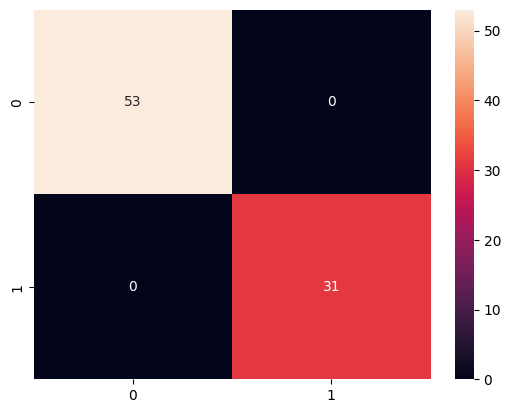

In [ ]:
test_pred=log_reg.predict(X_test)
test_acc=accuracy_score(Y_test,test_pred)
cn=confusion_matrix(Y_test,test_pred)
sns.heatmap(cn,annot=True)
print(test_acc)

In [ ]:
print(classification_report(Y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



**Using Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

1.0


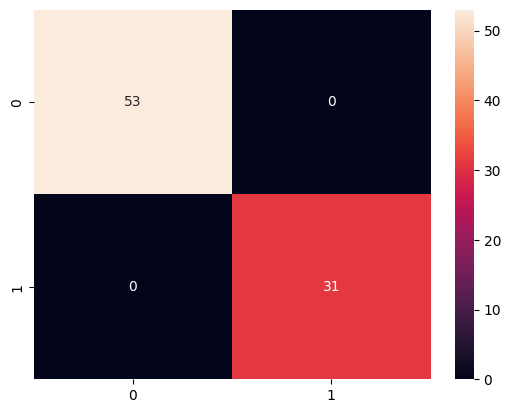

In [ ]:
test_pred=model.predict(X_test)
test_acc=accuracy_score(Y_test,test_pred)
cn=confusion_matrix(Y_test,test_pred)
sns.heatmap(cn,annot=True)
print(test_acc)

**Testing a model using a input**

In [ ]:
input_data=(2,0,62.0,0,0,9.6875,0,1,0)

input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# standardize the input data

# std_data=scaler.transform(input_data_reshaped)
# print(std_data)

prediction=log_reg.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):

    print("The person is not survived")
else:
    print("The person is survived")

[0]
The person is not survived
